<a href="https://colab.research.google.com/github/vkurpmax/Manipulator-Robot/blob/main/Test/Bounding_Box1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip --version

pip 23.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)


In [ ]:
! python --version

Python 3.10.11


In [ ]:
import torch
print(torch.__version__)

2.0.0+cu118


In [ ]:
pip install ultralytics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 584.5/584.5 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.3/203.3 kB 26.2 MB/s eta 0:00:00


In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow

def get_color(type):
    if(type == 0):
      return (255, 0, 0)
    elif(type == 1):
      return (0, 255, 0)
    elif(type == 2):
      return (0, 0, 255)
    elif(type == 3):
      return (0, 255, 255)

def get_point(x, y, w, h):
  return ((x, y), (x + w, y + h))

def draw_bounding_box(img, data):
  type, x, y, w, h = data
  start_point, end_point = get_point(x, y, w, h)
  cv.rectangle(img, start_point, end_point, get_color(type), 2)

NAME = "img0001" # change to img0002 and img0003

img = cv.imread(f"{NAME}.png")

with open(f"{NAME}.txt") as f:
    lines = f.readlines()
    for line in lines:
      datas = [int(data) for data in line.split(" ")]
      draw_bounding_box(img, datas)

cv2_imshow(img)
cv.imwrite(f"{NAME}_output.png", img)

cv.waitKey(0)
cv.destroyAllWindows()

ValueError: ignored

0
190
292
333
404
1
220
0
901
712


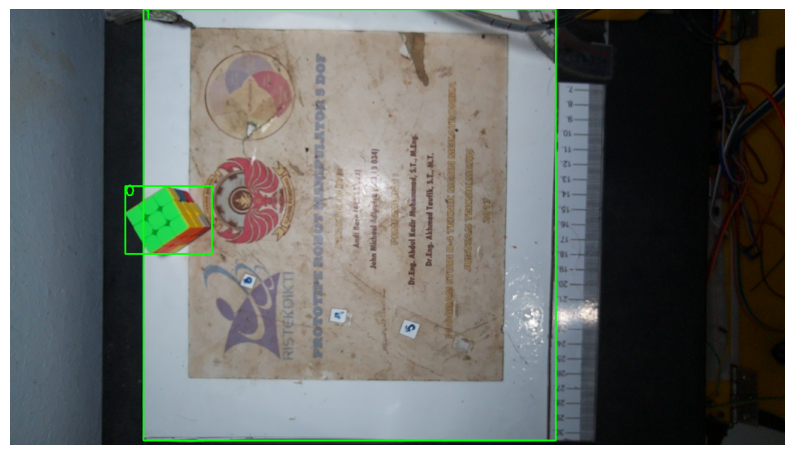

In [ ]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('img0001.png')

image_height, image_width, _ = image.shape

with open('img0001.txt', 'r') as file:
    annotations = file.readlines()

for annotation in annotations:
    label, x_norm, y_norm, width_norm, height_norm = map(float, annotation.strip().split())

    # Convert normalized coordinates to pixel values
    x = int(x_norm * image_width)
    y = int(y_norm * image_height)
    width = int(width_norm * image_width)
    height = int(height_norm * image_height)

    # Calculate the top-left and bottom-right coordinates of the bounding box
    x_min = int(x - width / 2)
    y_min = int(y - height / 2)
    x_max = int(x + width / 2)
    y_max = int(y + height / 2)

    print(int(label))
    print(x_min)
    print(y_min)
    print(x_max)
    print(y_max)
    
    # Draw the bounding box rectangle on the image
    cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)

    # Put the class label text near the bounding box
    label = str(int(label))
    cv2.putText(image, label, (x_min, y_min + 15), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0, 255, 0), 2)

# Display the image with bounding boxes
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [ ]:
print(x_min)
print(y_min)
print(x_max)
print(y_max)

220
0
901
712


0
668 540 112 125
-
612 477 724 602
 
1
563 354 689 709
-
218 0 907 708
 


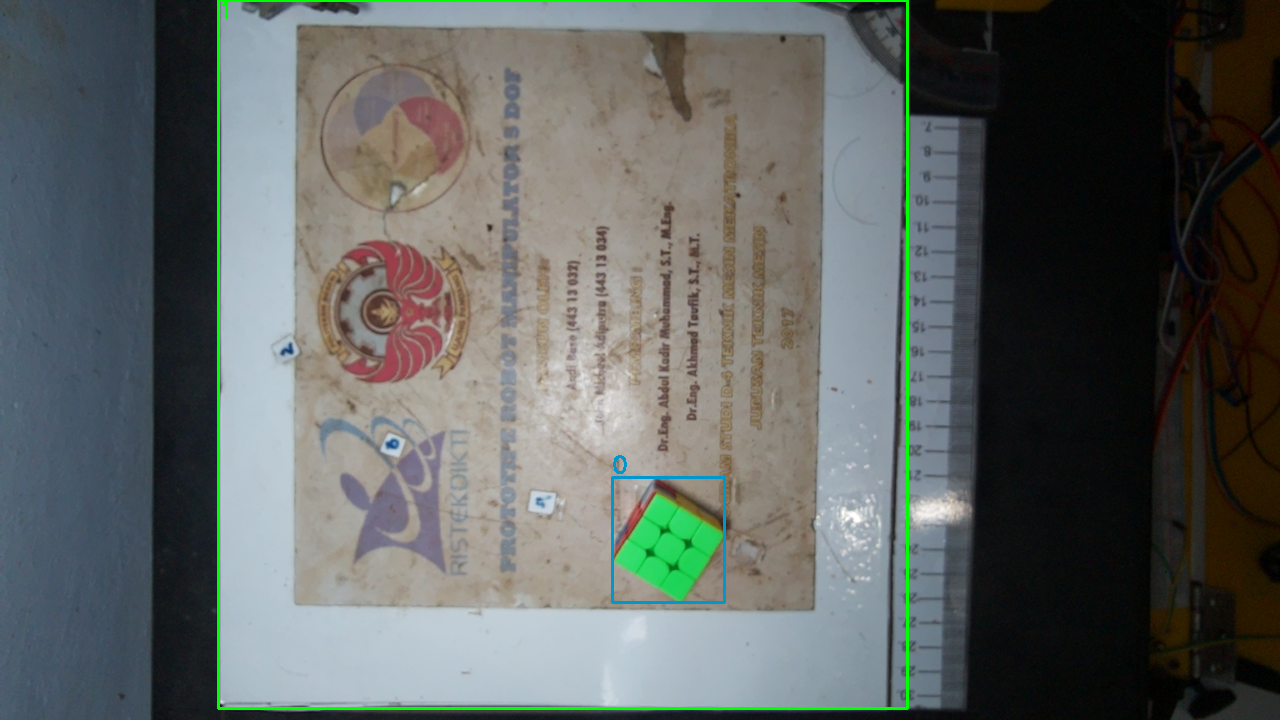

In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow

def get_color(label):
    if(label == 0):
      return (207, 151, 0)
    elif(label == 1):
      return (0, 255, 0)

def draw_bounding_box(img):
 # label_norm, x_norm, y_norm, width_norm, height_norm = map(float, annotation.strip().split())
  #global x_norm, y_norm, width_norm, height_norm
  global x_min_0, y_min_0, x_max_0, y_max_0
  global x_min_1, y_min_1, x_max_1, y_max_1

  label = int(label_norm)

  # Convert normalized coordinates to pixel values
  x = int(x_norm * image_width)
  y = int(y_norm * image_height)
  w = int(width_norm * image_width)
  h = int(height_norm * image_height)

  # Calculate the top-left and bottom-right coordinates of the bounding box
  x_min = int(x - w / 2)
  y_min = int(y - h / 2)
  x_max = int(x + w / 2)
  y_max = int(y + h / 2)

  def text_pos(label):
    if(label == 0):
      return (x_min, y_min - 5)
    elif(label == 1):
      return (x_min, y_min + 17)

  if(label == 0):
    x_min_0 = x_min
    y_min_0 = y_min
    x_max_0 = x_max
    y_max_0 = y_max
  elif(label == 1):
    x_min_1 = x_min
    y_min_1 = y_min
    x_max_1 = x_max
    y_max_1 = y_max
    
  print(label)
  print(x, y, w, h)
  print('-')
  print(x_min, y_min, x_max, y_max)
  print(' ')

  start_point, end_point = ((x_min, y_min), (x_max, y_max))
  cv.rectangle(img, start_point, end_point, get_color(label), 2)

  # Put the class label text near the bounding box
  cv.putText(img, str(label), text_pos(label), cv.FONT_HERSHEY_SIMPLEX, 0.75, get_color(label), 2)

NAME = "img0004" # change to img0002 and img0003

img = cv.imread(f"{NAME}.png")

image_height, image_width, _ = img.shape

with open(f"{NAME}.txt") as f:
    lines = f.readlines()
    for annotation in lines:
      label_norm, x_norm, y_norm, width_norm, height_norm = map(float, annotation.strip().split())
      draw_bounding_box(img)

cv2_imshow(img)
#cv.imwrite(f"{NAME}_output.png", img)

cv.waitKey(0)
cv.destroyAllWindows()



In [15]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [109]:
!dir

drive	     img0004.txt  img0006.png  img0007.txt  img0009.png  img0010.txt
img0003.txt  img0005.png  img0006.txt  img0008.png  img0009.txt  sample_data
img0004.png  img0005.txt  img0007.png  img0008.txt  img0010.png


In [105]:
!ls

In [124]:
%cd "drive/MyDrive/Politeknik Negeri Ujung Pandang/Semester 8/Colab/Tutor5c_training/data"

/content/drive/MyDrive/Politeknik Negeri Ujung Pandang/Semester 8/Colab/Tutor5c_training/data


In [108]:
%cd /content

/content


0
370.20544 118.54512 120.50944 120.50999999999999
-
310 58 430 179
 
1
564.0345599999999 353.42496 691.49056 706.84992
-
218 0 910 707
 


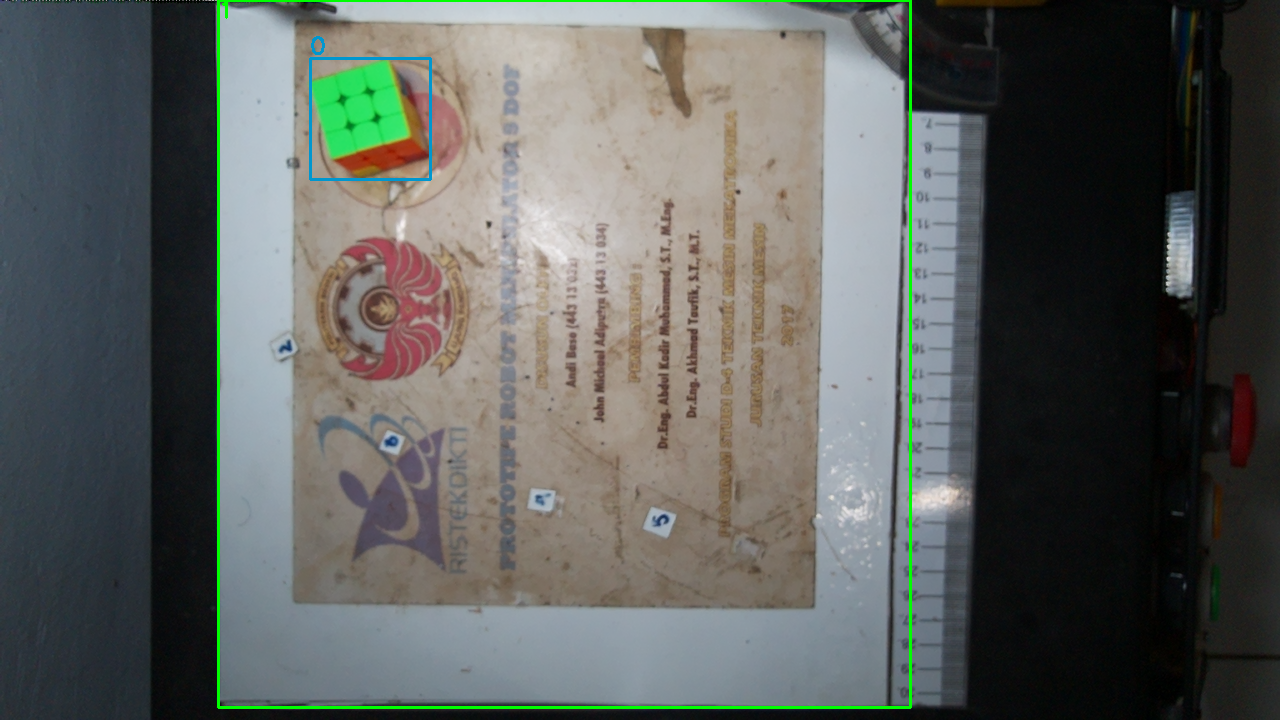

In [203]:
import cv2 as cv
from google.colab.patches import cv2_imshow

def get_color(label):
    if(label == 0):
      return (207, 151, 0)
    elif(label == 1):
      return (0, 255, 0)

def draw_bounding_box(img):
 # label_norm, x_norm, y_norm, width_norm, height_norm = map(float, annotation.strip().split())
  #global x_norm, y_norm, width_norm, height_norm
  global x_min_0, y_min_0, x_max_0, y_max_0
  global x_min_1, y_min_1, x_max_1, y_max_1

  label = int(label_norm)

  # Convert normalized coordinates to pixel values
  x = float(x_norm * image_width)
  y = float(y_norm * image_height)
  w = float(width_norm * image_width)
  h = float(height_norm * image_height)

  # Calculate the top-left and bottom-right coordinates of the bounding box
  x_min = round(x - w / 2)
  y_min = round(y - h / 2)
  x_max = round(x + w / 2)
  y_max = round(y + h / 2)

#"{:.4f}".format(number)
#f"{number:.4f}" x - w / 2

  def text_pos(label):
    if(label == 0):
      return (x_min, y_min - 5)
    elif(label == 1):
      return (x_min, y_min + 17)

  if(label == 0):
    x_min_0 = x_min
    y_min_0 = y_min
    x_max_0 = x_max
    y_max_0 = y_max
  elif(label == 1):
    x_min_1 = x_min
    y_min_1 = y_min
    x_max_1 = x_max
    y_max_1 = y_max
    
  print(label)
  print(x, y, w, h)
  print('-')
  print(x_min, y_min, x_max, y_max)
  print(' ')

  start_point, end_point = ((x_min, y_min), (x_max, y_max))
  cv.rectangle(img, start_point, end_point, get_color(label), 2)

  # Put the class label text near the bounding box
  cv.putText(img, str(label), text_pos(label), cv.FONT_HERSHEY_SIMPLEX, 0.75, get_color(label), 2)

NAME = "img0050" # change to img0002 and img0003

img = cv.imread(f"{NAME}.png")

image_height, image_width, _ = img.shape

with open(f"{NAME}.txt") as f:
    lines = f.readlines()
    for annotation in lines:
      label_norm, x_norm, y_norm, width_norm, height_norm = map(float, annotation.strip().split())
      draw_bounding_box(img)

cv2_imshow(img)
#cv.imwrite(f"{NAME}_output.png", img)

cv.waitKey(0)
cv.destroyAllWindows()



In [204]:
x_manip = (x_min_0 + (x_max_0 - x_min_0) / 2) - x_min_1
y_manip = y_max_1 - (y_min_0 + (y_max_0 - y_min_0) / 2)
print(x_manip, y_manip)

152.0 588.5


In [ ]:
damn = round(x_manip / 689 * 268)
#print(damn)
305 - damn

167

In [88]:
round(1.7)

2

In [ ]:
domn = round(y_manip / 709 * 315.6)
#print(domn)

#domn = 165.5 / 709 * 315.6
print(305 - domn)

192


In [93]:
int(1.7)

1

In [ ]:
450 / 689 = 175 / 270
130
168.5 / 709 = 75 / 280
75

168.5 / 709 = 230 / 280
75


In [ ]:
damn = 450 / 689 * 268
print(damn)

175.03628447024676


In [ ]:
damn = 45 / 689 * 268
print(damn)

17.503628447024674


In [ ]:
tensor([[568.8417, 433.8993, 116.4606, 121.3695],
        [523.6052, 348.4319, 631.0120, 678.6802]], device='cuda:0')

In [ ]:
domn = 254.5 / 709 * 315.6
print(domn)

domn = 165.5 / 709 * 315.6
print(305 - domn)

113.28660084626235
231.33032440056417


In [ ]:
x_manip = (x_min_0 + (x_max_0 - x_min_0) / 2) - x_min_1
y_manip = y_max_1 - (y_min_0 + (y_max_0 - y_min_0) / 2)
print(x_manip, y_manip)

457.0 165.0


In [ ]:
damn = 457 / 651 * 268
print(damn)

188.13517665130567


In [ ]:
damn = 354 / 689 * 268
print(damn)
305 - damn

137.69521044992743


167.30478955007257